In [ ]:
# 그래프 한글폰트 깨짐 해결 
## 맨 처음에 다른 코드들 실행하기 전에 현재 셀 실행해서 폰트 설치한 뒤 '런타임 다시 시작' 후 
## 현재 셀은 다시 주석 처리해서 실행하지 말고 다음 셀부터 실행하면 됨

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family']='NanumBarunGothic'
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

import warnings
warnings.filterwarnings("ignore")

# 방송사 vs OTT

## PyTrends

In [ ]:
from pytrends.request import TrendReq

pytrends=TrendReq(hl='ko', tz=540)

In [ ]:
kw_list=['넷플릭스', 'SBS', 'TvN', '티빙', 'TVING']
startdate='2013-01-01'
enddate='2022-08-24'
timerange=startdate+' '+enddate
pytrends.build_payload(kw_list, timeframe=timerange, geo='KR')

df_streaming=pytrends.interest_over_time()
df_streaming.drop('isPartial',axis=1,inplace=True)
df_streaming.tail(10)

,넷플릭스,SBS,TvN,티빙,TVING
date,,,,,
2021-11-01,95,4,2,17,3
2021-12-01,99,7,2,19,3
2022-01-01,100,6,2,18,4
2022-02-01,94,6,2,17,3
2022-03-01,79,6,3,14,3
2022-04-01,68,5,2,13,2
2022-05-01,63,4,2,14,2
2022-06-01,63,4,2,14,3
2022-07-01,88,4,2,18,3


In [ ]:
df_streaming['TVING']=df_streaming['TVING']+df_streaming['티빙']
df_streaming.drop('티빙',axis=1,inplace=True)
df_streaming.tail(10)

,넷플릭스,SBS,TvN,TVING
date,,,,
2021-11-01,95,4,2,20
2021-12-01,99,7,2,22
2022-01-01,100,6,2,22
2022-02-01,94,6,2,20
2022-03-01,79,6,3,17
2022-04-01,68,5,2,15
2022-05-01,63,4,2,16
2022-06-01,63,4,2,17
2022-07-01,88,4,2,21


- 넷플릭스 연관어

In [ ]:
kw='넷플릭스'
pytrends.build_payload([kw], timeframe=timerange, geo='KR')
df_nf=pytrends.related_topics()
df_nf_rising=df_nf[kw]['rising'].iloc[:,-2:]
df_nf_top=df_nf[kw]['top'].iloc[:,-2:]

In [ ]:
df_nf_rising

,topic_title,topic_type
0,왓챠,웹사이트
1,TVING,회사
2,wavve,주제
3,왓챠,회사
4,디즈니+,텔레비전 네트워크
5,넷플릭스,기업


In [ ]:
df_nf_top

,topic_title,topic_type
0,넷플릭스,기업
1,넷플릭스,웹사이트
2,왓챠,웹사이트
3,TVING,회사
4,wavve,주제
5,웨이브,주제
6,왓챠,회사
7,디즈니+,텔레비전 네트워크


- SBS 연관어

In [ ]:
kw='SBS'
pytrends.build_payload([kw], timeframe=timerange, geo='KR')
df_sbs=pytrends.related_topics()
df_sbs_rising=df_sbs[kw]['rising'].iloc[:,-2:]
df_sbs_top=df_sbs[kw]['top'].iloc[:,-2:]

In [ ]:
df_sbs_rising

,topic_title,topic_type
0,JTBC,종합편성채널
1,라이브,드라마
2,온 에어,드라마
3,매일방송,종합편성채널
4,팔라듐,화학 원소
5,스토브리그,드라마
6,김성준,기자
7,장예원,아나운서
8,SBS프리즘타워,건물
9,2019 SBS 연예대상,시상식


In [ ]:
df_sbs_top

,topic_title,topic_type
0,SBS,TV 스타
1,스페셜 브로드캐스팅 서비스,TV 네트워크
2,온 에어,드라마
3,SBS 스페셜,TV 프로그램
4,골프,스포츠
5,KBS,TV 네트워크
6,KBS,주제
7,SBS 골프,주제
8,MBC,TV 네트워크
9,방송,주제


- TvN, 티빙 연관어

In [ ]:
kw='TvN'
pytrends.build_payload([kw], timeframe=timerange, geo='KR')
df_tvn=pytrends.related_topics()
df_tvn_rising=df_tvn[kw]['rising'].iloc[:,-2:]
df_tvn_top=df_tvn[kw]['top'].iloc[:,-2:]

In [ ]:
df_tvn_rising

,topic_title,topic_type
0,온 에어,드라마
1,라이브,드라마
2,MBC,TV 네트워크
3,OCN,텔레비전 채널
4,도깨비,드라마
5,텔레비전 드라마,TV 장르
6,온 스타일,TV 채널
7,드라마,주제
8,tvN10 Awards,시상식
9,응답하라 1994,금토드라마


In [ ]:
df_tvn_top

,topic_title,topic_type
0,tvN,TV 네트워크
1,JTBC,종합편성채널
2,온 에어,드라마
3,방송,주제
4,TVING,회사
5,라이브,드라마
6,채널,통신
7,SBS,TV 스타
8,KBS,TV 네트워크
9,KBS,주제


In [ ]:
kw='TVING'
pytrends.build_payload([kw], timeframe=timerange, geo='KR')
df_tving=pytrends.related_topics()
df_tving_rising=df_tving[kw]['rising'].iloc[:,-2:]
df_tving_top=df_tving[kw]['top'].iloc[:,-2:]

In [ ]:
df_tving_rising

,topic_title,topic_type
0,wavve,주제
1,웨이브,주제
2,tvN,TV 네트워크
3,왓챠,웹사이트
4,온 에어,드라마
5,JTBC,종합편성채널
6,SBS,TV 스타
7,크롬캐스트,주제
8,CJ ONE,앱
9,OTT 서비스,주제


In [ ]:
df_tving_top

,topic_title,topic_type
0,TVING,회사
1,wavve,주제
2,웨이브,주제
3,tvN,TV 네트워크
4,푹,TV 네트워크
5,엠넷,TV 네트워크
6,왓챠,웹사이트
7,온 에어,드라마
8,JTBC,종합편성채널
9,코디,소프트웨어


### 검색량 추이 그래프

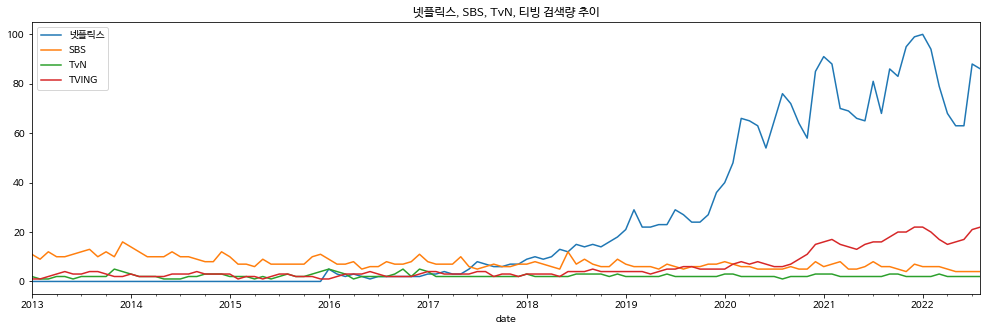

In [ ]:
df_streaming.plot(figsize=(17,5))
plt.title('넷플릭스, SBS, TvN, 티빙 검색량 추이')
plt.show()

## 주가 

In [ ]:
import FinanceDataReader as fdr

stock_nf=fdr.DataReader('NFLX','2013','2022-08-24') # 넷플릭스
stock_sbs=fdr.DataReader('034120','2013','2022-08-24') # SBS
stock_cj=fdr.DataReader('035760','2013','2022-08-24') # CJ ENM

In [ ]:
stock_nf.rename(columns={'Close':'넷플릭스'}, inplace=True)
stock_sbs.rename(columns={'Close':'SBS'}, inplace=True)
stock_cj.rename(columns={'Close':'CJ ENM'}, inplace=True)

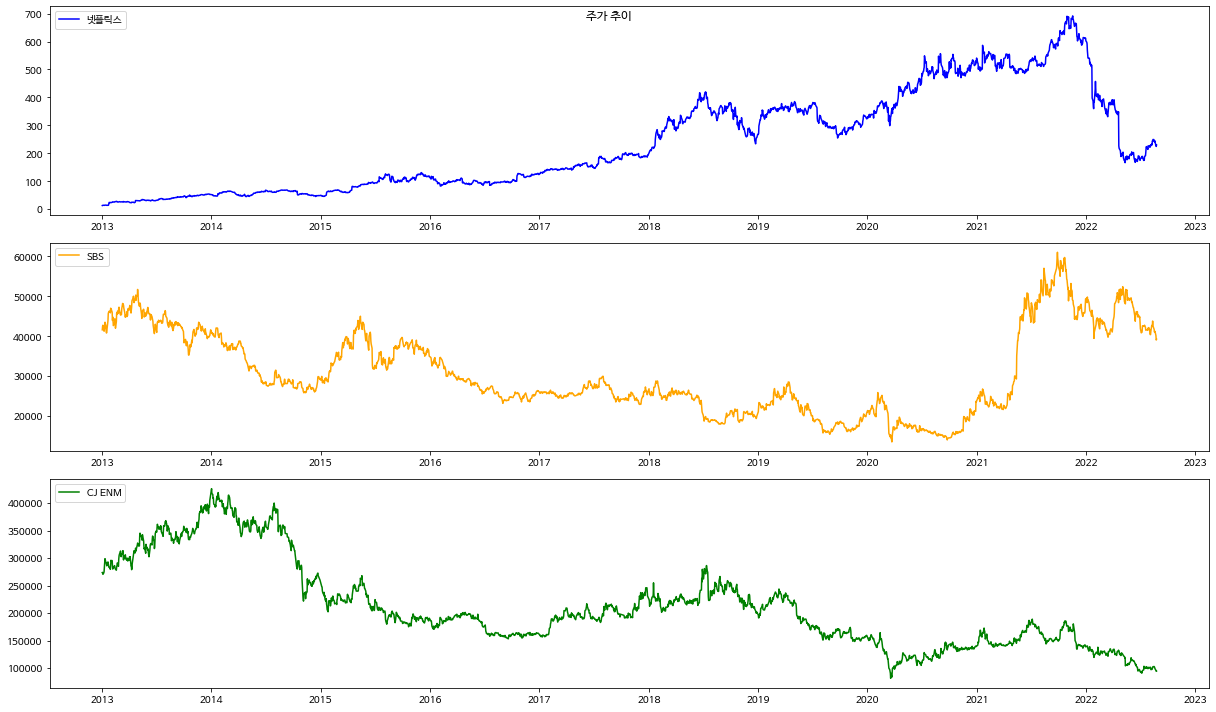

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(17,10))

ax[0].plot(stock_nf['넷플릭스'], c='b', label='넷플릭스')
ax[0].legend(loc='upper left')
ax[1].plot(stock_sbs['SBS'], c='orange', label='SBS')
ax[1].legend(loc='upper left')
ax[2].plot(stock_cj['CJ ENM'], c='g', label='CJ ENM')
ax[2].legend(loc='upper left')

plt.suptitle('주가 추이')
plt.tight_layout()
plt.show()